## <center> Crime Rate & Venues Data Analysis of Montreal </center>


### <center>Sandra Lian</center> <center>Feburary 12, 2021</center>

### A. Introduction

**A.1. Background Discussion**

Montreal is the second most populous city in Canada, with close to two million residents in the urban agglomeration. It is often considered as "Canada's Cultural Capital", and remains as an important centre of commerce, technology, education, art, culture and world affairs. The city has world-class universities, a lively cultural scene, a dynamic job market and the cost of living there is relatively low. As a result, it is often ranked the best city to be a university student in the world, and has become a popular destination for international students. According to Stats Can, the city is home to approximately 36,000 international university students. 

New to a foreign environment, it is important for international students to find suitable accommodations so they can focus on their  academic pursuits. Although some students choose to live on campus, it is common for others to find homes in other parts of the city. This analysis aims to help international students to find the best accommodations that fit their needs. 

There are two main criteria in evaluating the suitable accommodation in neighbourhoods. First, the neighbourhoods can provide good amenities and lively social scenes, such as restaurants, cafes, gyms, libraries and so on. Second, the communities should offer a safe living environment with few reported crimes. As part of this analysis, we will create a map where the reported crime rate is placed on Montreal and each community is clustered based on the venue density.

**A.2. Data Description**

* "Data on the Limit of Police District Station Sectors" from the City of Montreal website: This is a .csv file which has the coordinates of Montreal based on the locations of its Police Department Quarters (PDQs). There are 55 Police Department Quarters (PDQs) across the city of Montreal and they provide a complete representation of the city coverage.


* "Montreal Crimes Data" from the City of Montreal website: This .csv file has the recorded crimes in Montreal since the year of 2015. The crimes data is listed by each Police Department Quarters (PDQs), and has the following attributes: type of crimes, the number of crimes, the times when specific crimes are committed and the coordinates of the PDQs where the crimes were committed. During the data cleaning process, I found there are some missing values in the recent years. To ensure the completeness of data and relevant presentation of the crime rates, I decided to use the data from the year of 2019.


* With the combined info from "Data on the Limit of Police District Station Sectors" and "Montreal Crimes Data", I created a choropleth map of crime rates in Montreal.


* Foursquare API is used to get the most common venues of Montreal.

### B. Methodology & Data Exploration 

GitHub repository is used in performing and sharing this analysis. The master data will be created to include the components including Neighbourhood (PDQs), Latitude and Longitude informations of each neighbourhood, and the Total Number of Crimes in 2019. Below shows the detailed data cleaning and exploration process when analyzing the Montreal geogrpahic and crimes rate data, as well as using the Foursquare API for the venues data.

In [63]:
import pandas as pd
import numpy as np

In [64]:
df=pd.read_excel("C:/Users/14168/Desktop/Capstone_data.xlsx")
df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,0.000000,0.000000e+00,1.000000,1.000000
4,Méfait,2017-07-29,jour,12.0,0.000000,0.000000e+00,1.000000,1.000000


In [70]:
df1 = df['DATE'].dt.year
df1['Year'] = df['DATE'].dt.year
df2 = df.assign(DATE=df1['Year'])
df3=df2.loc[df2['DATE'] == 2019]
df2019_crimes=df3.groupby('CATEGORIE').count()
df2019_crimes_new=df3.groupby('PDQ').count()
df2019_crimes_new=df3.groupby('PDQ').count()
df2019_crimes_new.set_index(["CATEGORIE"], inplace = True, 
                    append = True, drop = True) 
df2019_crimes_new.reset_index(inplace = True) 
df2019_crimes_new.head()

<ipython-input-70-b746f3363f05>:2: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  df1['Year'] = df['DATE'].dt.year
C:\Users\14168\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  iloc._setitem_with_indexer(indexer, value)


,PDQ,CATEGORIE,DATE,QUART,X,Y,LONGITUDE,LATITUDE
0,1.0,275,275,275,275,275,275,275
1,3.0,550,550,550,550,550,550,550
2,4.0,318,318,318,318,318,318,318
3,5.0,675,675,675,675,675,675,675
4,7.0,1202,1202,1202,1202,1202,1202,1202


Below we will use the bar chart to evaluate the number of crimes per each neighbourhood as reported by various PDQs. As we can see below, the neighbourhoods close to Montreal Police Department Quarters (PDQs) 20, 26 and 38 reported a much higher number of crimes than the other parts of the city in 2019. Therefore,  when choosing accommodations, we should pay close attention to these neighbourhoods:

<AxesSubplot:xlabel='PDQ'>

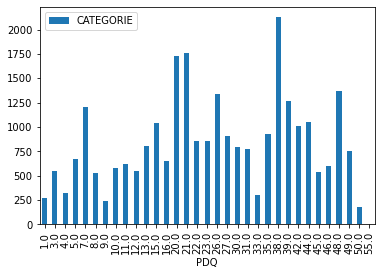

In [71]:
df_test=df2019_crimes_new.drop(["DATE","QUART", "X", "Y","LONGITUDE", "LATITUDE"], axis=1)
df_test2=df_test.sort_values(["PDQ"])
df_test2.set_index(["PDQ"], inplace = True, 
                    append = True, drop = True) 
df_test2.reset_index(inplace = True) 
df_test2.plot(kind='bar',x='PDQ',y='CATEGORIE')

In below section, we will create two dataframes to help 1). plot the map of Montreal; 2). plot crimes rates across different parts of the city. The maps will be demonstrated in the final report when all report sections are inlucded.

In [73]:
df4 = df3[['DATE', 'PDQ', 'LATITUDE', 'LONGITUDE', 'CATEGORIE']]
df5 = df4[['DATE','PDQ','LATITUDE',  'LONGITUDE']]
df6 = df5.drop_duplicates(subset=['PDQ'])
df7=df6.sort_values(["PDQ"])
df7.set_index(["DATE"], inplace = True, 
                    append = True, drop = True) 
df7.reset_index(inplace = True) 
df7.head()

,level_0,DATE,PDQ,LATITUDE,LONGITUDE
0,101574,2019,1.0,45.426522,-73.868164
1,87293,2019,3.0,45.505988,-73.821669
2,103087,2019,4.0,45.501623,-73.787537
3,102470,2019,5.0,45.464523,-73.835019
4,56565,2019,7.0,45.504832,-73.688365


In [74]:
df8=df7.join(df_test.set_index('PDQ'), on='PDQ')
df8.head()

,level_0,DATE,PDQ,LATITUDE,LONGITUDE,CATEGORIE
0,101574,2019,1.0,45.426522,-73.868164,275
1,87293,2019,3.0,45.505988,-73.821669,550
2,103087,2019,4.0,45.501623,-73.787537,318
3,102470,2019,5.0,45.464523,-73.835019,675
4,56565,2019,7.0,45.504832,-73.688365,1202


In below sections, Foursquare API is used to analyze, segment and cluster the different neighbourhoods in Montreal. The limit on venues is set at 100, and radius as 1000 meters for each neighbourhood from their geographic coordinates. Below is the example of the listed venues information from Foursquare API.

In [75]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [76]:
import json 

import requests
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

from geopy.geocoders import Nominatim

print('Libraries imported.')

Libraries imported.


Python folium library is used to create the map of Montreal, with the coordinates information provided by the data gathered

In [77]:
address = 'Montreal, Quebec'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 45.4972159, -73.6103642.


In [78]:
# create map of Montreal using latitude and longitude values
map_montreal = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, PDQ in zip(df7['LATITUDE'], df7['LONGITUDE'], df7['PDQ']):
    label = '{}'.format(PDQ)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_montreal)  
    
map_montreal

Foursquare API is used to analyze, segment and cluster the different neighbourhoods in Montreal. The limit on venues is set at 100, and radius as 1000 meters for each neighbourhood from their geographic coordinates. Below is the example of the listed venues information from Foursquare API.

In [79]:
CLIENT_ID = 'GMQDPSPAVM3D2OHHTNG3P3BQO01D1RW13ISO5CK01P1PWAYQ' 
CLIENT_SECRET = 'RNRXINDMTT51IRRVO2GRLCE2HVNW4P5XBGKGYWCSG5Q1Y43V' 
VERSION = '20180605' 
LIMIT = 100 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GMQDPSPAVM3D2OHHTNG3P3BQO01D1RW13ISO5CK01P1PWAYQ
CLIENT_SECRET:RNRXINDMTT51IRRVO2GRLCE2HVNW4P5XBGKGYWCSG5Q1Y43V


In [80]:
PDQ_latitude = df7.loc[0, 'LATITUDE'] 
PDQ_longitude = df7.loc[0, 'LONGITUDE'] 

PDQ_number = df7.loc[0, 'PDQ'] 

print('Latitude and longitude values of {} are {}, {}.'.format(PDQ_number, 
                                                               PDQ_latitude, 
                                                               PDQ_longitude))

Latitude and longitude values of 1.0 are 45.426521958428, -73.8681639297084.


In [81]:
LIMIT = 100 
radius = 1000 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    PDQ_latitude, 
    PDQ_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=GMQDPSPAVM3D2OHHTNG3P3BQO01D1RW13ISO5CK01P1PWAYQ&client_secret=RNRXINDMTT51IRRVO2GRLCE2HVNW4P5XBGKGYWCSG5Q1Y43V&v=20180605&ll=45.426521958428,-73.8681639297084&radius=1000&limit=100'

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '602c95a61c939b4186c35102'},
 'response': {'headerLocation': 'Beaconsfield',
  'headerFullLocation': 'Beaconsfield',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 45.43552196742801,
    'lng': -73.85536412115755},
   'sw': {'lat': 45.417521949427986, 'lng': -73.88096373825925}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b76dcf9f964a5202b652ee3',
       'name': 'Arena Beaconsfield',
       'location': {'address': '1974 City Lane',
        'crossStreet': 'Beaconsfield',
        'lat': 45.42565062942731,
        'lng': -73.86659293642353,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.42565062942731,
          'lng': -73.86659293642353}],
        'distance': 156

In [82]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [83]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

<ipython-input-83-0c46ee588efb>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,name,categories,lat,lng
0,Arena Beaconsfield,Hockey Arena,45.425651,-73.866593
1,park city lane,Soccer Field,45.425301,-73.865801
2,Plaza Elm,Pizza Place,45.431739,-73.865350
3,Cugini's Pizza Cafe,Pizza Place,45.431706,-73.864628


Below steps create the same process to explore venues in all Montreal PDQs

In [84]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [85]:
montreal_venues = getNearbyVenues(names=df7['PDQ'],
                                   latitudes=df7['LATITUDE'],
                                   longitudes=df7['LONGITUDE']
                                  )

1.0
3.0
4.0
5.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
15.0
16.0
20.0
21.0
22.0
23.0
26.0
27.0
30.0
31.0
33.0
35.0
38.0
39.0
42.0
44.0
45.0
46.0
48.0
49.0
50.0
55.0


Here is the toal number of venues returned by Foursquare. Below show the combined information between various neighbourhoods and venues

In [86]:
print(montreal_venues.shape)
montreal_venues.head()

(632, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1.0,45.426522,-73.868164,Arena Beaconsfield,45.425651,-73.866593,Hockey Arena
1,1.0,45.426522,-73.868164,park city lane,45.425301,-73.865801,Soccer Field
2,1.0,45.426522,-73.868164,City Park,45.425026,-73.865735,Park
3,3.0,45.505988,-73.821669,Restaurant Bombay Choupati,45.508404,-73.820454,Indian Restaurant
4,3.0,45.505988,-73.821669,Aryana,45.504587,-73.817885,Middle Eastern Restaurant


In [87]:
montreal_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
1.0,3,3,3,3,3,3
3.0,20,20,20,20,20,20
4.0,4,4,4,4,4,4
5.0,34,34,34,34,34,34
7.0,4,4,4,4,4,4
8.0,4,4,4,4,4,4
9.0,3,3,3,3,3,3
10.0,8,8,8,8,8,8
11.0,17,17,17,17,17,17


Below we can see that the neighbourhoods near the Montreal Police Department Quarters (PDQ) 20 and 38 have the highest number of venues among the communities in Montreal, with close to 100 venues returned by Foursquare API. Followed by the area near PDQ 26 which has approximately 60 venues.

In [88]:
df_bar=montreal_venues.groupby('Neighborhood').count()
df_bar.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
1.0,3,3,3,3,3,3
3.0,20,20,20,20,20,20
4.0,4,4,4,4,4,4
5.0,34,34,34,34,34,34
7.0,4,4,4,4,4,4


In [89]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

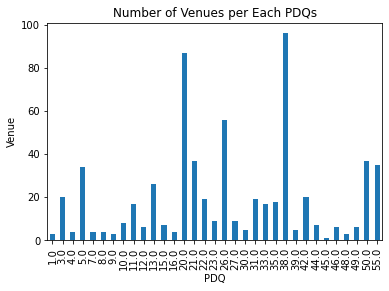

In [90]:
df_bar1=df_bar['Venue']
df_bar1.plot(kind='bar')

plt.title ('Number of Venues per Each PDQs')
plt.xlabel ('PDQ')
plt.ylabel ('Venue')

plt.show

Below shows the number of unique categories can be curated from all the returned venues

In [91]:
print('There are {} uniques categories.'.format(len(montreal_venues['Venue Category'].unique())))

There are 172 uniques categories.


In below section, we will analyze each neighbourhood

In [92]:
# one hot encoding
montreal_onehot = pd.get_dummies(montreal_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
montreal_onehot['Neighborhood'] = montreal_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [montreal_onehot.columns[-1]] + list(montreal_onehot.columns[:-1])
montreal_onehot = montreal_onehot[fixed_columns]

montreal_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,...,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Train Station,Transportation Service,Tunnel,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Yoga Studio
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
montreal_onehot.shape

(632, 173)

Below the rows are grouped by neighborhood and by taking the mean of the frequency of occurrence of each category

In [94]:
montreal_grouped = montreal_onehot.groupby('Neighborhood').mean().reset_index()
montreal_grouped.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,...,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Train Station,Transportation Service,Tunnel,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Yoga Studio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.058824,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
montreal_grouped.shape

(33, 173)

Print each neighborhood along with the top 10 most common venues

In [96]:
num_top_venues = 10

for hood in montreal_grouped['Neighborhood']:
    temp = montreal_grouped[montreal_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

                       venue  freq
0               Soccer Field  0.33
1               Hockey Arena  0.33
2                       Park  0.33
3    North Indian Restaurant  0.00
4                Men's Store  0.00
5              Metro Station  0.00
6         Mexican Restaurant  0.00
7  Middle Eastern Restaurant  0.00
8              Movie Theater  0.00
9                Music Venue  0.00


                  venue  freq
0     Indian Restaurant  0.20
1             Pool Hall  0.05
2                Market  0.05
3        Sandwich Place  0.05
4      Sushi Restaurant  0.05
5          Liquor Store  0.05
6                  Bank  0.05
7  Brazilian Restaurant  0.05
8              Pharmacy  0.05
9           Pizza Place  0.05


                       venue  freq
0                Pizza Place  0.25
1                   Pharmacy  0.25
2              Train Station  0.25
3          Convenience Store  0.25
4                        ATM  0.00
5    North Indian Restaurant  0.00
6              Metro Station  0.00
7

In [97]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [98]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = montreal_grouped['Neighborhood']

for ind in np.arange(montreal_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(montreal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,Soccer Field,Hockey Arena,Park,Convenience Store,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio
1,3.0,Indian Restaurant,Pizza Place,Pharmacy,Coffee Shop,Pool Hall,Portuguese Restaurant,Middle Eastern Restaurant,Sandwich Place,Brazilian Restaurant,Market
2,4.0,Convenience Store,Pizza Place,Pharmacy,Train Station,Yoga Studio,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio
3,5.0,Clothing Store,Electronics Store,Sporting Goods Shop,Restaurant,Café,Furniture / Home Store,Toy / Game Store,Fast Food Restaurant,Cosmetics Shop,Bank
4,7.0,Gym,Pharmacy,Park,Spa,Cocktail Bar,Coffee Shop,Discount Store,Diner,Dessert Shop,Department Store


In [99]:
montreal_grouped.shape

(33, 173)

There are some commonalities among different areas within Montreal. To explore their similarities,  the unsupervised learning K-means algorithm is used to segment and cluster the neighbourhoods. The total neighborhoods are segmented into 6 clusters. 

The table below shows the detailed information of the clustered neighbourhood:


In [100]:
# set number of clusters
kclusters = 6

montreal_grouped_clustering = montreal_grouped.drop('Neighborhood',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(montreal_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 2, 2, 1, 5, 1, 2, 2, 2])

In [101]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

montreal_merged = df7

# merge montreal_grouped with df7 to add latitude/longitude for each neighborhood
montreal_merged = montreal_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='PDQ')

montreal_merged.head() # check the last columns!

,level_0,DATE,PDQ,LATITUDE,LONGITUDE,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,101574,2019,1.0,45.426522,-73.868164,1,Soccer Field,Hockey Arena,Park,Convenience Store,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio
1,87293,2019,3.0,45.505988,-73.821669,2,Indian Restaurant,Pizza Place,Pharmacy,Coffee Shop,Pool Hall,Portuguese Restaurant,Middle Eastern Restaurant,Sandwich Place,Brazilian Restaurant,Market
2,103087,2019,4.0,45.501623,-73.787537,2,Convenience Store,Pizza Place,Pharmacy,Train Station,Yoga Studio,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio
3,102470,2019,5.0,45.464523,-73.835019,2,Clothing Store,Electronics Store,Sporting Goods Shop,Restaurant,Café,Furniture / Home Store,Toy / Game Store,Fast Food Restaurant,Cosmetics Shop,Bank
4,56565,2019,7.0,45.504832,-73.688365,1,Gym,Pharmacy,Park,Spa,Cocktail Bar,Coffee Shop,Discount Store,Diner,Dessert Shop,Department Store


Visualization of Montreal Cluster Map: with all data cleaned, explored and analyzed, we can now create a clustered neighbourhood map for the city of Montreal. Please see below:

In [102]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(montreal_merged['LATITUDE'], montreal_merged['LONGITUDE'], montreal_merged['PDQ'], montreal_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examine Clusters**

**Cluster 1**

In [103]:
montreal_merged.loc[montreal_merged['Cluster Label'] == 0, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,DATE,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,2019,0,Park,Convenience Store,Mediterranean Restaurant,Cosmetics Shop,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio


**Cluster 2**

In [104]:
montreal_merged.loc[montreal_merged['Cluster Label'] == 1, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,DATE,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2019,1,Soccer Field,Hockey Arena,Park,Convenience Store,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio
4,2019,1,Gym,Pharmacy,Park,Spa,Cocktail Bar,Coffee Shop,Discount Store,Diner,Dessert Shop,Department Store
6,2019,1,Pool,Skating Rink,Park,Convenience Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio,Cupcake Shop
15,2019,1,Park,Performing Arts Venue,Sandwich Place,Grocery Store,Ice Cream Shop,Bakery,Restaurant,Fast Food Restaurant,Mexican Restaurant,Boxing Gym
16,2019,1,Park,Pharmacy,Supermarket,Restaurant,Theater,French Restaurant,Ice Cream Shop,Hardware Store,Coffee Shop,Cocktail Bar
24,2019,1,Grocery Store,Pharmacy,Gas Station,Park,Italian Restaurant,Yoga Studio,Convenience Store,Diner,Dessert Shop,Department Store
26,2019,1,Chinese Restaurant,Convenience Store,Grocery Store,Pharmacy,Park,Scenic Lookout,Nature Preserve,Dessert Shop,Department Store,Deli / Bodega


**Cluster 3**

In [105]:
montreal_merged.loc[montreal_merged['Cluster Label'] == 2, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,DATE,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,2019,2,Indian Restaurant,Pizza Place,Pharmacy,Coffee Shop,Pool Hall,Portuguese Restaurant,Middle Eastern Restaurant,Sandwich Place,Brazilian Restaurant,Market
2,2019,2,Convenience Store,Pizza Place,Pharmacy,Train Station,Yoga Studio,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio
3,2019,2,Clothing Store,Electronics Store,Sporting Goods Shop,Restaurant,Café,Furniture / Home Store,Toy / Game Store,Fast Food Restaurant,Cosmetics Shop,Bank
7,2019,2,Pharmacy,Gas Station,Discount Store,Bank,Sandwich Place,Asian Restaurant,Shopping Mall,Comedy Club,Cycle Studio,Clothing Store
8,2019,2,Persian Restaurant,Café,Restaurant,Park,Pizza Place,Grocery Store,Discount Store,Korean Restaurant,Japanese Restaurant,Breakfast Spot
9,2019,2,Gym,Coffee Shop,Shoe Store,Italian Restaurant,Playground,Café,College Gym,Discount Store,Diner,Dessert Shop
10,2019,2,Pharmacy,Fast Food Restaurant,Coffee Shop,Pet Store,Italian Restaurant,Bank,Café,Convenience Store,Middle Eastern Restaurant,Sandwich Place
11,2019,2,Video Store,Playground,Tunnel,Pool,Business Service,Bus Station,Breakfast Spot,Yoga Studio,Convenience Store,Dessert Shop
13,2019,2,Coffee Shop,Hotel,Restaurant,French Restaurant,Café,Sandwich Place,Sushi Restaurant,Liquor Store,Gastropub,Cocktail Bar
14,2019,2,Hotel,Vietnamese Restaurant,Café,Convenience Store,Italian Restaurant,Plaza,French Restaurant,Coffee Shop,Seafood Restaurant,Library


**Cluster 4**

In [106]:
montreal_merged.loc[montreal_merged['Cluster Label'] == 3, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,DATE,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,2019,3,Bus Stop,Yoga Studio,Cosmetics Shop,Dive Bar,Discount Store,Diner,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio


**Cluster 5**

In [107]:
montreal_merged.loc[montreal_merged['Cluster Label'] == 4, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,DATE,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,2019,4,Candy Store,Bar,Diner,Yoga Studio,Cupcake Shop,Dive Bar,Discount Store,Dessert Shop,Department Store,Deli / Bodega


**Cluster 6**

In [108]:
montreal_merged.loc[montreal_merged['Cluster Label'] == 5, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,DATE,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,2019,5,Electronics Store,Shipping Store,Antique Shop,Skating Rink,Yoga Studio,Cupcake Shop,Discount Store,Diner,Dessert Shop,Department Store


As one of the main goals for this analysis is to demonstrate  the Crime Rates in Montreal so we can easily identify the safe vs. dangerous neighbourhoods, I created the choropleth map below which shows the number of crimes committed in 2019.

In [109]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [110]:
import os
import wget
from folium import plugins

In [111]:
montreal_geo = r'limitespdq.geojson' 

montreal_map = folium.Map(location=[45.4972159, -73.6103642], zoom_start=11)
montreal_map

In [112]:
montreal_map.choropleth(
    geo_data=montreal_geo,
    data=df8,
    columns=['PDQ', 'CATEGORIE'],
    key_on='feature.properties.PDQ',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Crimes in 2019'
)

# display map
montreal_map

At last, the neighbourhood clusters were layered upon the Crime Rate Choropleth map, which shows the social scenes of various neighborhoods and their reported crimes.

In [113]:
map_clusters = montreal_map

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(montreal_merged['LATITUDE'], montreal_merged['LONGITUDE'], montreal_merged['PDQ'], montreal_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters